In [6]:
from pycaret.classification import *
import pandas as pd
import os

In [7]:
data_dir = "download/data_collected/1"

In [18]:
jumping = pd.read_pickle(os.path.join(data_dir, "sample_Jumping_1.pckl"))
lunge = pd.read_pickle(os.path.join(data_dir, "sample_Lunge_1.pckl"))
pushup = pd.read_pickle(os.path.join(data_dir, "sample_Pushup_1.pckl"))
situp = pd.read_pickle(os.path.join(data_dir, "sample_Situp_1.pckl"))
squat = pd.read_pickle(os.path.join(data_dir, "sample_Squat_1.pckl"))
data_df = pd.concat([jumping, lunge, pushup, situp, squat]).reset_index(drop=True)
data_df

,activity,acc-x-axis,acc-y-axis,acc-z-axis,gyro-x-axis,gyro-y-axis,gyro-z-axis,mag-x-axis,mag-y-axis,mag-z-axis
0,Jumping,-4.05,10.77,-3.18,2.77,-4.98,3.66,-6.84,3.00,-2.10
1,Jumping,-3.83,11.00,-3.38,-2.31,2.26,-5.38,-7.06,2.85,-2.13
2,Jumping,-6.61,7.81,-0.58,0.75,31.82,-34.35,-6.34,3.65,-1.65
3,Jumping,4.04,-0.35,-1.07,14.46,-24.49,12.97,-6.87,3.26,-1.81
4,Jumping,-1.59,8.93,-3.71,-0.98,9.55,25.44,-6.56,3.28,-2.01
...,...,...,...,...,...,...,...,...,...,...
395,Squat,2.28,11.44,-8.53,-94.56,-21.56,-128.14,-6.72,1.60,-6.04
396,Squat,-1.92,9.98,-2.82,-16.89,14.78,-34.10,-5.62,4.37,-4.08
397,Squat,-0.99,11.16,-4.27,65.78,40.05,94.20,-6.12,3.91,-3.92
398,Squat,2.43,7.01,-9.99,77.08,29.24,62.79,-6.13,0.97,-7.03


In [22]:
# train using pycaret svm
clf = setup(data=data_df, target="activity", session_id=123)
svm = create_model("svm")

,Description,Value
0,Session id,123
1,Target,activity
2,Target type,Multiclass
3,Target mapping,"Jumping: 0, Lunge: 1, Pushup: 2, Situp: 3, Squat: 4"
4,Original data shape,"(400, 10)"
5,Transformed data shape,"(400, 10)"
6,Transformed train set shape,"(280, 10)"
7,Transformed test set shape,"(120, 10)"
8,Numeric features,9
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.0000,0.7500,0.7647,0.7351,0.6884,0.6996
1,0.4286,0.0000,0.4286,0.4694,0.4234,0.2866,0.2937
2,0.5000,0.0000,0.5000,0.5167,0.5065,0.3748,0.3754
3,0.4286,0.0000,0.4286,0.4450,0.4290,0.2878,0.2929
4,0.6071,0.0000,0.6071,0.6181,0.5771,0.5080,0.5410
5,0.5714,0.0000,0.5714,0.6029,0.5765,0.4624,0.4646
6,0.7143,0.0000,0.7143,0.7117,0.7079,0.6410,0.6431
7,0.6071,0.0000,0.6071,0.5857,0.5808,0.5072,0.5164
8,0.6786,0.0000,0.6786,0.6990,0.6740,0.5981,0.6049


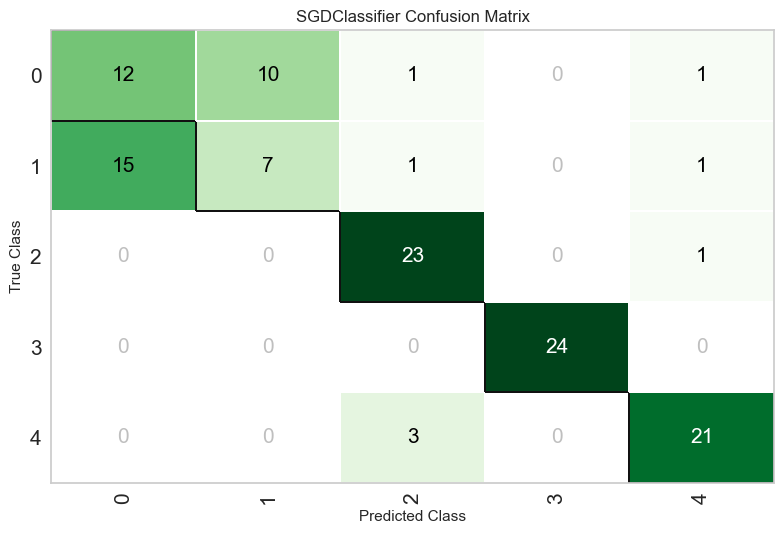

In [23]:
plot_model(svm, plot="confusion_matrix")

In [19]:
# train model using pycaret
clf = setup(data=data_df, target="activity", session_id=123, experiment_name="experiment_1")
best_model = compare_models()
print(best_model)

,Description,Value
0,Session id,123
1,Target,activity
2,Target type,Multiclass
3,Target mapping,"Jumping: 0, Lunge: 1, Pushup: 2, Situp: 3, Squat: 4"
4,Original data shape,"(400, 10)"
5,Transformed data shape,"(400, 10)"
6,Transformed train set shape,"(280, 10)"
7,Transformed test set shape,"(120, 10)"
8,Numeric features,9
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9429,0.9935,0.9429,0.9486,0.9422,0.9284,0.9302,0.0580
lightgbm,Light Gradient Boosting Machine,0.9393,0.9922,0.9393,0.9443,0.9386,0.9240,0.9256,0.1510
rf,Random Forest Classifier,0.9286,0.9943,0.9286,0.9321,0.9282,0.9106,0.9117,0.0660
dt,Decision Tree Classifier,0.9179,0.9489,0.9179,0.9220,0.9172,0.8972,0.8987,0.0120
qda,Quadratic Discriminant Analysis,0.9179,0.9912,0.9179,0.9235,0.9167,0.8972,0.8995,0.0140
gbc,Gradient Boosting Classifier,0.9179,0.9863,0.9179,0.9223,0.9171,0.8971,0.8987,0.1310
nb,Naive Bayes,0.9143,0.9901,0.9143,0.9268,0.9129,0.8926,0.8962,0.0100
lr,Logistic Regression,0.8107,0.9551,0.8107,0.8153,0.8032,0.7633,0.7698,0.8960
ridge,Ridge Classifier,0.8107,0.0000,0.8107,0.8319,0.8058,0.7635,0.7716,0.0090
lda,Linear Discriminant Analysis,0.8107,0.9561,0.8107,0.8345,0.8063,0.7637,0.7715,0.0140


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)


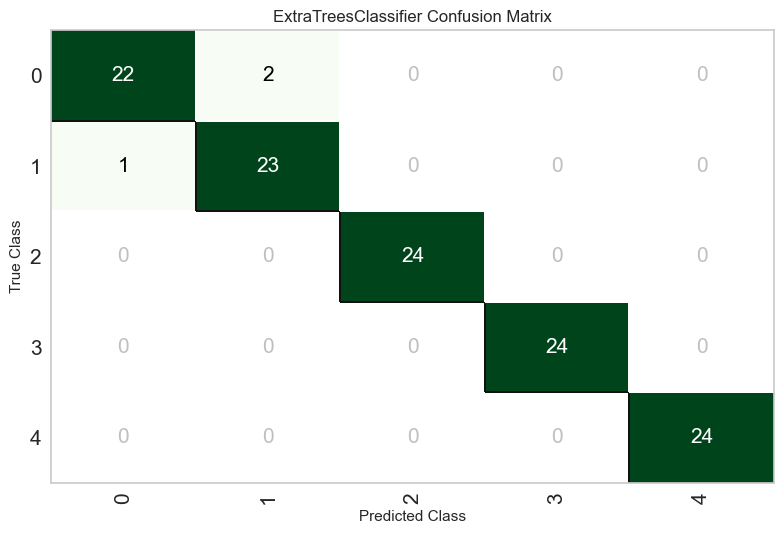

In [21]:
cf = plot_model(best_model, plot="confusion_matrix")

In [24]:
save_model(best_model, "svm_model_1")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['acc-x-axis', 'acc-y-axis',
                                              'acc-z-axis', 'gyro-x-axis',
                                              'gyro-y-axis', 'gyro-z-axis',
                                              'mag-x-axis', 'mag-y-axis',
                                              'mag-z-axis'],
                                     transformer=SimpleI...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                                     